In [0]:
### This notebook uses Python 3.x ###
### Author: GTKlondike            ###


# Download data from Github
! git clone https://github.com/NetsecExplained/Machine-Learning-for-Security-Analysts.git
data_dir = "Machine-Learning-for-Security-Analysts"

fatal: destination path 'Machine-Learning-for-Security-Analysts' already exists and is not an empty directory.


In [0]:
# ======= Imports =======
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Used for graphing the confusion matrix
import seaborn as sns

import random
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix

# ======= /Imports =======
print("Libraries imported")

Libraries imported


In [0]:
#path to our all urls file
allurls = data_dir + '/Malicious URLs.csv'

#reading file
allurlscsv = pd.read_csv(allurls,',',error_bad_lines=False, header=None)

#converting it into an array
allurlsdata = np.array(allurlscsv)

#shuffling
np.random.shuffle(allurlsdata)

print("=== Raw Data ===")
print(allurlsdata[:5])
print("")

print("=== Formatted Data ===")
for e in allurlsdata[:5]:
  print("{0} - {1}".format(e[1], e[0]))

=== Raw Data ===
[['6i3cb6owitcouepv.paybrakepoint.com/img/lb.png' 'bad']
 ['findagrave.com/php/famous.php?page=name&firstName=Aline&lastName=Towne'
  'good']
 ['hillquest.com/history/timeline_bridges.html' 'good']
 ['grandprizecaterers.com/zilla/' 'bad']
 ['select.nytimes.com/gst/abstract.html?res=F50712F7345516738DDDAC0894D8415B8188F1D3'
  'good']]

=== Formatted Data ===
bad - 6i3cb6owitcouepv.paybrakepoint.com/img/lb.png
good - findagrave.com/php/famous.php?page=name&firstName=Aline&lastName=Towne
good - hillquest.com/history/timeline_bridges.html
bad - grandprizecaterers.com/zilla/
good - select.nytimes.com/gst/abstract.html?res=F50712F7345516738DDDAC0894D8415B8188F1D3


In [0]:
def getTokens(input):
    tokensBySlash = str(input.encode('utf-8')).split('/')    #get tokens after splitting by slash
    allTokens = []
    for i in tokensBySlash:
        tokens = str(i).split('-')    #get tokens after splitting by dash
        tokensByDot = []
        for j in range(0,len(tokens)):
            tempTokens = str(tokens[j]).split('.')    #get tokens after splitting by dot
            tokensByDot = tokensByDot + tempTokens
        allTokens = allTokens + tokens + tokensByDot
    allTokens = list(set(allTokens))    #remove redundant tokens
    if 'com' in allTokens:
        allTokens.remove('com')    #removing .com since it occurs a lot of times and it should not be included in our features
    return allTokens

s = allurlsdata[2][0]
t = getTokens(s)
print("Example URL:")
print(s)
print("")
print("URL Split:")
print(t)

Example URL:
hillquest.com/history/timeline_bridges.html

URL Split:
['timeline_bridges', "b'hillquest.com", "b'hillquest", "html'", "timeline_bridges.html'", 'history']


In [0]:
#all labels 
y = [d[1] for d in allurlsdata]

#all urls corresponding to a label (either good or bad)
corpus = [d[0] for d in allurlsdata]

#get a vector for each url but use our customized tokenizer


# !!! TODO !!! 
#   Change the 'vectorizer' to a CountVectorizer and compare the results

vectorizer = TfidfVectorizer(tokenizer=getTokens)
#vectorizer = CountVectorizer(tokenizer=getTokens)


X = vectorizer.fit_transform(corpus) #get the X vector

print("Printing input")
print(X[0])
print("")
print("Printing labels")
print(y[:5])
print(corpus[:5])

Printing input
  (0, 129764)	0.418631756439048
  (0, 501581)	0.3020700133606744
  (0, 532762)	0.4386880351325282
  (0, 591826)	0.418631756439048
  (0, 532739)	0.38628870895148815
  (0, 129760)	0.3460699366185892
  (0, 612681)	0.3111559933003973

Printing labels
['bad', 'good', 'good', 'bad', 'good']
['6i3cb6owitcouepv.paybrakepoint.com/img/lb.png', 'findagrave.com/php/famous.php?page=name&firstName=Aline&lastName=Towne', 'hillquest.com/history/timeline_bridges.html', 'grandprizecaterers.com/zilla/', 'select.nytimes.com/gst/abstract.html?res=F50712F7345516738DDDAC0894D8415B8188F1D3']


Counting the split:
X inputs: 420464
X_train: 294324
X_test: 126140
Good: 241526
Bad: 52798


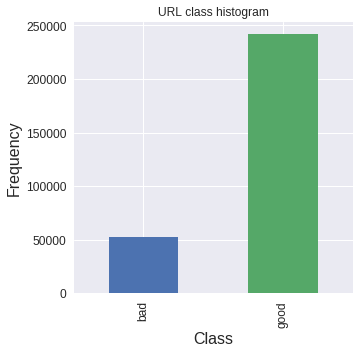

In [0]:
#split into training and testing set 70/30 ratio

# !!! TODO !!!
# Change the test size from 30% to 20% of the data and compare the results
test_percentage = .3

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_percentage, random_state=42)

print("Counting the split:")
print("X inputs:", X.shape[0])
print("X_train:", X_train.shape[0])
print("X_test:", X_test.shape[0])

plt.figure(figsize=(5,5))
count_classes = pd.value_counts(y_train, sort = True).sort_index()
count_classes.plot(kind = 'bar', fontsize=12)
plt.title("URL class histogram")
plt.xlabel("Class", size=16)
plt.ylabel("Frequency", size=16)

print("Good:", y_train.count("good"))
print("Bad:", y_train.count("bad"))

In [0]:
# === /LGS ===
# This takes about 45 seconds on Colab

#using logistic regression
lgs = LogisticRegression(solver='lbfgs', max_iter=1000)
lgs.fit(X_train, y_train)
score = lgs.score(X_test, y_test)

#printing the score.
print("logistic predictor")
print(score)
lgs_pred = lgs.predict(X_test)

cmL = confusion_matrix(lgs_pred, y_test)
#print(cmL)

# === /LGS ===

logistic predictor
0.9593546852703345


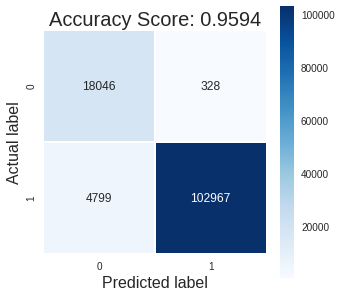

In [0]:
# Print confusion matrix
plt.figure(figsize=(5,5))
sns.heatmap(cmL, annot=True, fmt="d", linewidths=.5, square = True, cmap = 'Blues')
plt.ylabel('Actual label', size=16);
plt.xlabel('Predicted label', size=16);
all_sample_title = 'Accuracy Score: {0:.4f}'.format(score)
plt.title(all_sample_title, size = 20);

In [0]:
# === MNB ===
# This takes about 1 second on Colab

mnb = MultinomialNB()
mnb.fit(X_train, y_train)
score = mnb.score(X_test, y_test)

print("multiNB predictor")
print(mnb.score(X_test, y_test))
mnb_pred = mnb.predict(X_test)
cmB = confusion_matrix(mnb_pred, y_test)
#print(cmB)

# === /MNB ===

multiNB predictor
0.9633106072617726


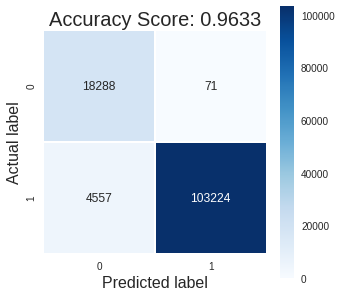

In [0]:
# Print confusion matrix
plt.figure(figsize=(5,5))
sns.heatmap(cmB, annot=True, fmt="d", linewidths=.5, square = True, cmap = 'Blues')
plt.ylabel('Actual label', size=16);
plt.xlabel('Predicted label', size=16);
all_sample_title = 'Accuracy Score: {0:.4f}'.format(score)
plt.title(all_sample_title, size = 20);